### Riley Payung, Hilina Gebre, Jae Jeong
### Jason Kinser
### CDS 411
### September 30, 2020

In [694]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

def Init(x,y,pctempty):
    emptycellcount = int(x * y * pctempty);
    print(emptycellcount)
    grid = np.random.random((x,y));
    
    for i in range(emptycellcount):
        rand1 = np.random.randint(0,x);
        rand2 = np.random.randint(0,y);
        while (grid[rand1,rand2] == 0.0):
            rand1 = np.random.randint(0,x);
            rand2 = np.random.randint(0,y);
        grid[rand1,rand2]=0;
    return grid;

def unhappy(grid,x,y,v,h,delta=0.1):
    
    answer = 0;
    upper = grid[x,y] + delta;
    lower = grid[x,y] - delta;
    
    if (x - 1 >= 0 and y - 1 > 0):
        answer += grid[x,y-1] != 0.0 and (grid[x-1,y-1] > (upper) or grid[x-1,y-1] < (lower));
    if (y - 1 >= 0):
        answer += grid[x,y-1] != 0.0 and (grid[x,y-1] > (upper) or grid[x,y-1] < (lower));
    if ( y - 1 >= 0 and x + 1 < v):
        answer += grid[x+1,y-1] != 0.0 and (grid[x+1,y-1] > (upper) or grid[x+1,y-1] < (lower));
    
    if (x - 1 >= 0):
        answer += grid[x-1,y] != 0.0 and (grid[x-1,y] > (upper) or grid[x-1,y] < (lower));
    if (x + 1 < v):
        answer += grid[x+1,y] != 0.0 and (grid[x+1,y] > (upper) or grid[x+1,y] < (lower));
    
    if (x - 1 >= 0 and y + 1 < h):
        answer += grid[x-1,y+1] != 0.0 and (grid[x-1,y+1] > (upper) or grid[x-1,y+1] < (lower));
    if (y + 1 < h):
        answer += grid[x,y+1] != 0.0 and (grid[x,y+1] > (upper) or grid[x,y+1] < (lower));
    if (x + 1 < v and y + 1 < h):
        answer += grid[x+1,y+1] != 0.0 and (grid[x+1,y+1] > (upper) or grid[x+1,y+1] < (lower));
    return answer;

def Findempty(grid):
    v,h = grid.shape
    empties = [];
    for i in range(v):
        for j in range(h):
            if (grid[i,j]==0.0):
                empties.append(tuple((i,j)));
    value = np.random.randint(0,len(empties));
    x,y = empties[value]
    return x,y;


In [729]:
def collectUnhappy(grid,x,y,v,h, delta, gamma = 4):
    return unhappy(grid,x,y,v,h,delta) > gamma;
def Iterate(grid,delta,gamma):
    v,h = grid.shape;
    x = np.random.randint(0,v);
    y = np.random.randint(0,h);
    unhappy = collectUnhappy(grid,x,y,v,h,delta,gamma);
    # try to find for 10 cycles
    count = 0;
    while (not unhappy and count < 10):
        x = np.random.randint(0,v);
        y = np.random.randint(0,h);
        unhappy = collectUnhappy(grid,x,y,v,h,delta,gamma);
        count += 1;
    if (unhappy):
        newx,newy = Findempty(grid);
        grid[newx,newy] = grid[x,y];
        grid[x,y] = 0.0;
    return grid;
def avgHappiness(grid,delta):
    width,height = grid.shape
    count = 0;
    for i in range(width):
        for j in range(height): 
            if(collectUnhappy(grid,i,j,width,height,delta)):
                count += 1;
    rf = count / (width * height);
    return (1-rf)*100;
def run(N = 100000, interval = 10, v = 100, h = 100, pctempty = 0.1, delta = 0.1, gamma = 4):
    grid = Init(v,h,pctempty);
    if (interval == 1):
        for i in range(N):
            grid = Iterate(grid,delta,gamma);
        print("Happiness after %d iterations: %.2f" % (N,avgHappiness(grid,delta)),"%");
    else:
        M = N / interval;
        for i in range(int(interval)):
            for j in range(int(M)):
                grid = Iterate(grid,delta,gamma);
            print("Happiness after %d iterations: %.2f" % ((i+1)*M,avgHappiness(grid,delta)),"%");
    plt.imshow(grid,cmap="gray");
    plt.show()

1000
Happiness after 15000 iterations: 30.73 %
Happiness after 30000 iterations: 38.62 %
Happiness after 45000 iterations: 47.93 %
Happiness after 60000 iterations: 54.69 %
Happiness after 75000 iterations: 63.14 %
Happiness after 90000 iterations: 70.38 %
Happiness after 105000 iterations: 77.01 %
Happiness after 120000 iterations: 83.83 %
Happiness after 135000 iterations: 87.47 %
Happiness after 150000 iterations: 90.02 %


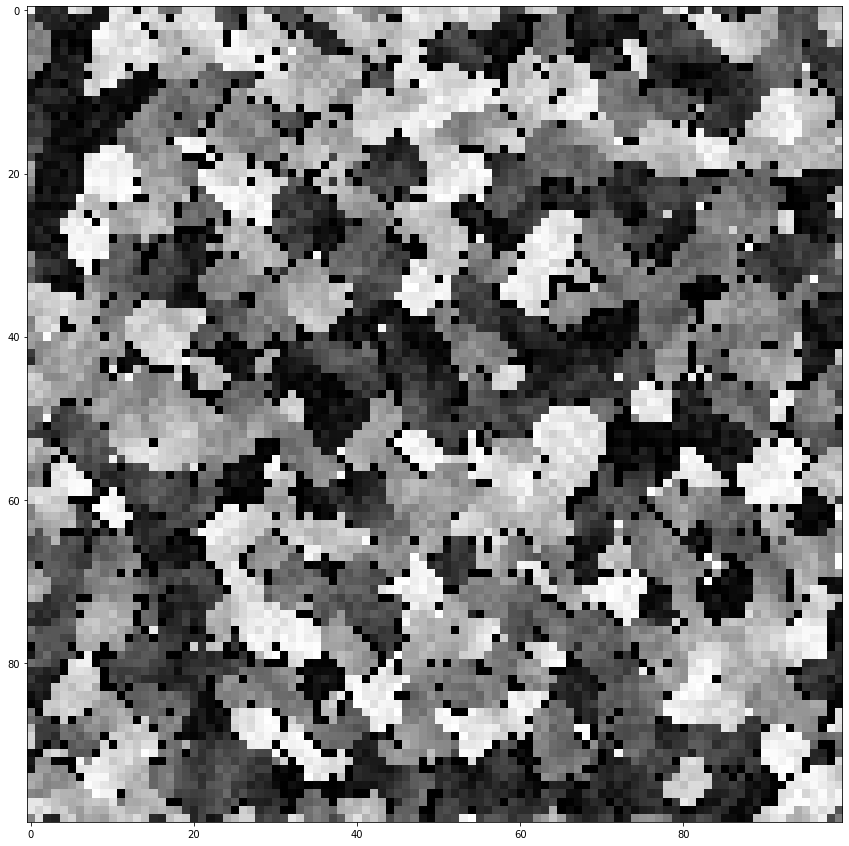

In [730]:
run(N = 150000, interval = 10)